In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ..


/home/ubuntu/sustaingym


In [11]:
import pickle
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

from stable_baselines3 import PPO, A2C
from stable_baselines3.common.callbacks import EvalCallback, CallbackList
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.utils import set_random_seed
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv

from sustaingym.envs.evcharging import EVChargingEnv, GMMsTraceGenerator, RealTraceGenerator
from sustaingym.algorithms.evcharging.baselines import GreedyAlgorithm, RandomAlgorithm, RLAlgorithm, MPC
from sustaingym.envs.evcharging.utils import SiteStr, DefaultPeriodStr


                 alg    reward
0             greedy  0.389076
1  random_continuous  0.263513
2    random_discrete  0.248863
3              mpc_1  0.389076
4              mpc_3  0.388736
5              mpc_6  0.386551
6             mpc_12  0.352528
7             mpc_24  0.352023


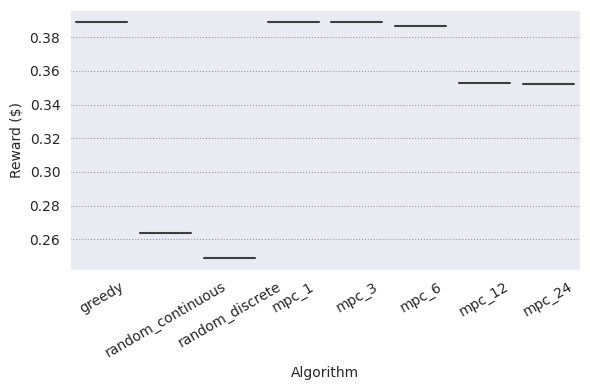

In [30]:
# greedy, mpc1, mpc3, mpc6, mpc12, mpc24, random_cont, random_disc

# site and period

def read_baseline(site: SiteStr, period: DefaultPeriodStr, algorithm: str) -> pd.DataFrame:
    """Read reward results from csv files."""
    return pd.read_csv(f'logs/baselines/{site}_{period}_{algorithm}.csv', compression='gzip')

def plot_violins(site: SiteStr, period: DefaultPeriodStr):
    """Plot violin plots."""
    algs = ['greedy', 'random_continuous', 'random_discrete']
    for window in [1, 3, 6, 12, 24]:
        algs.append(f'mpc_{window}')
    
    records = []
    for alg in algs:
        df = read_baseline(site, period, alg)
        reward = list(np.array(df.reward))
        for r in reward:
            records.append((alg, r))

    fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
    df = pd.DataFrame.from_records(records, columns=['alg', 'reward'])
    print(df.head(15))
    sns.violinplot(data=df, x='alg', y='reward', ax=ax)
    ax.set(xlabel='Algorithm', ylabel="Reward ($)")
    ax.set_xticklabels(algs, rotation=30)
    

plot_violins('caltech', 'Summer 2021')


In [13]:
np.array(df.reward)

array([ 0.81000267,  7.12209815,  7.787734  ,  8.44916529,  8.44381886,
        2.5235969 ,  2.19818623, 14.67658892,  8.29037764,  9.77846961,
        9.8984681 ,  7.60455224,  3.47867028,  1.64250959,  8.59199555,
        4.89104686,  9.20992011, 11.93309986, 10.53457963,  0.96060549,
        2.14232913, 13.51523817,  8.01647654,  8.67696749, 10.3004209 ,
       10.62527734,  1.0093041 ,  2.93294256, 11.4986265 , 13.38265194,
        9.06967645, 11.07485061, 12.55480364,  1.79721828,  0.13576155,
       12.05268005, 11.72373648,  9.8262364 , 10.54913899,  8.69481937,
        4.01732714,  1.31687213, 12.21697052,  9.00185892,  8.55692941,
       10.07591572, 11.17500724,  2.13981368,  1.75622955,  8.8869871 ,
       12.02593309,  8.88263015, 11.85996659,  8.83409994,  3.24826059,
        3.28599225, 13.53590663, 14.97318231,  8.56210285,  8.39113862,
       11.4936087 ,  1.2894437 ,  3.10270509,  8.54779936,  9.4232613 ,
        9.48088641, 10.2030386 , 14.04757847,  1.2253035 ,  5.06